In [0]:
import os
from os.path import join
from os import listdir, rmdir
import zipfile
import requests
import io
from io import StringIO, BytesIO
import glob
from shutil import move
import random

In [0]:
def download_images(url):
  if(os.path.isdir("tiny-imagenet-200")):
    print("Images already downloaded...")
    return
  r = requests.get(url, stream=True)
  print("Downloading "+url)
  zip_ref = zipfile.ZipFile(BytesIO(r.content))
  zip_ref.extractall("./")
  zip_ref.close()

In [3]:
download_images("http://cs231n.stanford.edu/tiny-imagenet-200.zip")

In [0]:
import io
import glob
import os
from shutil import move
from os.path import join
from os import listdir, rmdir

target_folder = './tiny-imagenet-200/val/'
dest_folder   = './tiny-imagenet-200/train/'

val_dict = {}
with open('./tiny-imagenet-200/val/val_annotations.txt', 'r') as f:
    for line in f.readlines():
        split_line = line.split('\t')
        val_dict[split_line[0]] = split_line[1]
        
paths = glob.glob('./tiny-imagenet-200/val/images/*')        
        
for path in paths:
    file = path.split('/')[-1]
    folder = val_dict[file]
    dest = dest_folder + str(folder) + '/images/' + str(file)
    move(path, dest)
    
rmdir('./tiny-imagenet-200/val/images')

In [0]:
target_folder = './tiny-imagenet-200/train/'
train_folder = './tiny-imagenet-200/train_set/'
test_folder = './tiny-imagenet-200/test_set/'

os.mkdir(train_folder)
os.mkdir(test_folder)

paths = glob.glob('./tiny-imagenet-200/train/*')

for path in paths:
    folder = path.split('/')[-1].split('\\')[-1]
    source = target_folder+str(folder+'/images/')
    train_dest = train_folder+str(folder+'/')
    test_dest = test_folder+str(folder+'/')
    os.mkdir(train_dest)
    os.mkdir(test_dest)
    images = glob.glob(source+str('*'))
    
    #making random
    random.shuffle(images)
    
    test_imgs = images[:165].copy()
    train_imgs = images[165:].copy()
    
    #moving 30% for validation
    for image in test_imgs:
        file = image.split('/')[-1].split('\\')[-1]
        dest = test_dest+str(file)
        move(image, dest)
        
    #moving 70% for training
    for image in train_imgs:
        file = image.split('/')[-1].split('\\')[-1]
        dest = train_dest+str(file)
        move(image, dest)

In [0]:
!pip install albumentations==0.4.5

In [0]:
from data_loader_tinyimagenet import tiny_imagenet
from resnet import ResNet, BasicBlock
from utils import model_summary, plot_logs
from train import train_model
from torch import nn
import torch.optim as optim
import torch

In [0]:
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2], 200)

In [17]:
trainloader, testloader = tiny_imagenet()

CUDA Available? True


In [0]:
net = ResNet18()

In [19]:
device = model_summary(net, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [24]:
trainer = train_model(trainloader, testloader, device)
logs, misclassified_images = trainer.run_model(net, lr=0.01, epochs=50, patience=5, sch=True)

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1


Loss=4.441676139831543 Batch_id=150 Accuracy=5.35: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 4.5204, Accuracy: 2404/33000 (7.28%)

EPOCH: 2


Loss=4.095428466796875 Batch_id=150 Accuracy=11.07: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 4.0682, Accuracy: 4126/33000 (12.50%)

EPOCH: 3


Loss=3.6046674251556396 Batch_id=150 Accuracy=15.49: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.9298, Accuracy: 5088/33000 (15.42%)

EPOCH: 4


Loss=3.646259069442749 Batch_id=150 Accuracy=19.08: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.6279, Accuracy: 6533/33000 (19.80%)

EPOCH: 5


Loss=3.2248806953430176 Batch_id=150 Accuracy=22.44: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.6741, Accuracy: 6128/33000 (18.57%)

EPOCH: 6


Loss=3.1125552654266357 Batch_id=150 Accuracy=25.10: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.6206, Accuracy: 6639/33000 (20.12%)

EPOCH: 7


Loss=2.9858932495117188 Batch_id=150 Accuracy=27.59: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.1708, Accuracy: 8937/33000 (27.08%)

EPOCH: 8


Loss=2.962643623352051 Batch_id=150 Accuracy=29.83: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.1333, Accuracy: 9085/33000 (27.53%)

EPOCH: 9


Loss=2.9941091537475586 Batch_id=150 Accuracy=32.10: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.3181, Accuracy: 8316/33000 (25.20%)

EPOCH: 10


Loss=2.750809907913208 Batch_id=150 Accuracy=33.71: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.9112, Accuracy: 10606/33000 (32.14%)

EPOCH: 11


Loss=2.7077956199645996 Batch_id=150 Accuracy=35.86: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.9928, Accuracy: 10398/33000 (31.51%)

EPOCH: 12


Loss=2.7541720867156982 Batch_id=150 Accuracy=37.43: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.6703, Accuracy: 12131/33000 (36.76%)

EPOCH: 13


Loss=2.552048444747925 Batch_id=150 Accuracy=39.04: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.8074, Accuracy: 11344/33000 (34.38%)

EPOCH: 14


Loss=2.5636727809906006 Batch_id=150 Accuracy=40.74: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.5998, Accuracy: 12443/33000 (37.71%)

EPOCH: 15


Loss=2.4448111057281494 Batch_id=150 Accuracy=42.00: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.5647, Accuracy: 12709/33000 (38.51%)

EPOCH: 16


Loss=2.753019332885742 Batch_id=150 Accuracy=43.54: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.7030, Accuracy: 11987/33000 (36.32%)

EPOCH: 17


Loss=2.2667107582092285 Batch_id=150 Accuracy=44.82: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.6056, Accuracy: 12652/33000 (38.34%)

EPOCH: 18


Loss=2.228553295135498 Batch_id=150 Accuracy=46.06: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.5190, Accuracy: 13352/33000 (40.46%)

EPOCH: 19


Loss=2.03965425491333 Batch_id=150 Accuracy=47.22: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.4732, Accuracy: 13595/33000 (41.20%)

EPOCH: 20


Loss=2.0820963382720947 Batch_id=150 Accuracy=48.27: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.4728, Accuracy: 13664/33000 (41.41%)

EPOCH: 21


Loss=2.0705034732818604 Batch_id=150 Accuracy=49.44: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.4552, Accuracy: 13708/33000 (41.54%)

EPOCH: 22


Loss=2.1583681106567383 Batch_id=150 Accuracy=50.28: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.4012, Accuracy: 14267/33000 (43.23%)

EPOCH: 23


Loss=2.115889310836792 Batch_id=150 Accuracy=51.51: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.3817, Accuracy: 14180/33000 (42.97%)

EPOCH: 24


Loss=1.9445170164108276 Batch_id=150 Accuracy=52.37: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.2461, Accuracy: 15078/33000 (45.69%)

EPOCH: 25


Loss=2.2073333263397217 Batch_id=150 Accuracy=53.26: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.4243, Accuracy: 14214/33000 (43.07%)

EPOCH: 26


Loss=1.8985389471054077 Batch_id=150 Accuracy=54.23: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.4119, Accuracy: 14347/33000 (43.48%)

EPOCH: 27


Loss=1.9888304471969604 Batch_id=150 Accuracy=55.25: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.5936, Accuracy: 13431/33000 (40.70%)

EPOCH: 28


Loss=1.7588502168655396 Batch_id=150 Accuracy=56.06: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.2219, Accuracy: 15463/33000 (46.86%)

EPOCH: 29


Loss=1.5923787355422974 Batch_id=150 Accuracy=56.73: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.1923, Accuracy: 15698/33000 (47.57%)

EPOCH: 30


Loss=1.6553301811218262 Batch_id=150 Accuracy=57.69: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.3843, Accuracy: 14706/33000 (44.56%)

EPOCH: 31


Loss=1.5961556434631348 Batch_id=150 Accuracy=58.69: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.3281, Accuracy: 15015/33000 (45.50%)

EPOCH: 32


Loss=1.828240990638733 Batch_id=150 Accuracy=59.54: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.2091, Accuracy: 15717/33000 (47.63%)

EPOCH: 33


Loss=1.5952575206756592 Batch_id=150 Accuracy=60.18: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.2232, Accuracy: 15556/33000 (47.14%)

EPOCH: 34


Loss=1.4561442136764526 Batch_id=150 Accuracy=60.75: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.2152, Accuracy: 15841/33000 (48.00%)

EPOCH: 35


Loss=1.6308940649032593 Batch_id=150 Accuracy=61.61: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.1969, Accuracy: 15813/33000 (47.92%)

EPOCH: 36


Loss=1.1400730609893799 Batch_id=150 Accuracy=68.59: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8311, Accuracy: 18237/33000 (55.26%)

EPOCH: 37


Loss=1.03507661819458 Batch_id=150 Accuracy=70.70: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8196, Accuracy: 18330/33000 (55.55%)

EPOCH: 38


Loss=1.2116954326629639 Batch_id=150 Accuracy=71.64: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8198, Accuracy: 18376/33000 (55.68%)

EPOCH: 39


Loss=1.0346029996871948 Batch_id=150 Accuracy=71.72: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8123, Accuracy: 18462/33000 (55.95%)

EPOCH: 40


Loss=1.0660178661346436 Batch_id=150 Accuracy=72.32: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8224, Accuracy: 18354/33000 (55.62%)

EPOCH: 41


Loss=1.135392189025879 Batch_id=150 Accuracy=72.58: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8173, Accuracy: 18357/33000 (55.63%)

EPOCH: 42


Loss=1.2627606391906738 Batch_id=150 Accuracy=72.47: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8132, Accuracy: 18386/33000 (55.72%)

EPOCH: 43


Loss=1.1548768281936646 Batch_id=150 Accuracy=72.99: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8241, Accuracy: 18320/33000 (55.52%)

EPOCH: 44


Loss=1.0273823738098145 Batch_id=150 Accuracy=73.20: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8152, Accuracy: 18383/33000 (55.71%)

EPOCH: 45


Loss=0.9934253692626953 Batch_id=150 Accuracy=73.32: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8152, Accuracy: 18431/33000 (55.85%)

EPOCH: 46


Loss=0.9550901651382446 Batch_id=150 Accuracy=74.25: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8046, Accuracy: 18510/33000 (56.09%)

EPOCH: 47


Loss=1.0634821653366089 Batch_id=150 Accuracy=74.52: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8034, Accuracy: 18519/33000 (56.12%)

EPOCH: 48


Loss=1.060758113861084 Batch_id=150 Accuracy=74.48: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8019, Accuracy: 18555/33000 (56.23%)

EPOCH: 49


Loss=1.0093532800674438 Batch_id=150 Accuracy=74.71: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8025, Accuracy: 18547/33000 (56.20%)

EPOCH: 50


Loss=1.2044765949249268 Batch_id=150 Accuracy=74.71: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]



Test set: Average loss: 1.8030, Accuracy: 18534/33000 (56.16%)



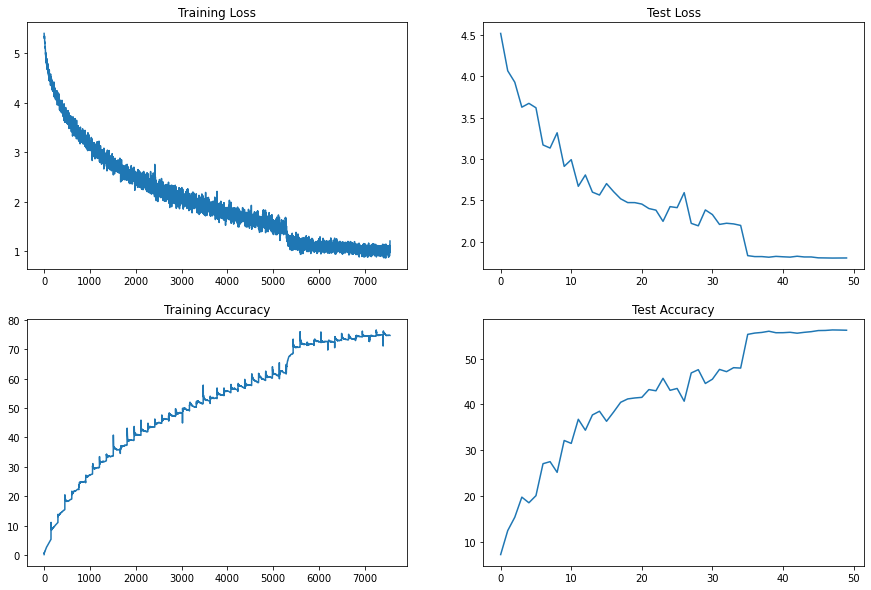

In [25]:
plot_logs(logs)